In [1]:
import os
import pandas as pd

# Danh sách các thư mục chứa dữ liệu
root_dirs = [r"C:\Users\quang\OneDrive\Máy tính\DatasetQA\Fall_result\hanh_dong_don_le"]

# Hàm kiểm tra và xử lý từng tệp dữ liệu
def check_file(file_path):
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()

        # Tìm chỉ mục của dòng '@DATA'
        data_start_index = None
        for i in range(len(lines)):
            if lines[i].strip() == "@DATA":
                data_start_index = i + 1  # Lấy dòng ngay sau @DATA
        
        # Nếu không tìm thấy '@DATA', đọc toàn bộ file
        if data_start_index is None:
            print(f"⚠ Không tìm thấy '@DATA' trong {file_path}, đọc toàn bộ file.")
            data_start_index = 0
        else:
            print(f"📄 Đọc dữ liệu từ {file_path} sau @DATA.")

        # Lấy dữ liệu sau @DATA (hoặc toàn bộ file nếu không có @DATA)
        data_lines = lines[data_start_index:]

        # Chuyển dữ liệu thành DataFrame
        data = pd.DataFrame([line.strip().split(',') for line in data_lines], columns=["Timestamp", "ax", "ay", "az"])

        # Chuyển đổi cột ax, ay, az sang kiểu số
        for col in ['ax', 'ay', 'az']:
            data[col] = pd.to_numeric(data[col], errors='coerce')
            if data[col].isnull().any():
                raise ValueError(f"⚠ Cột {col} có giá trị NaN hoặc không hợp lệ trong {file_path}")

        print(f"✅ Hoàn thành xử lý: {file_path} ({len(data)} dòng hợp lệ)")

    except Exception as e:
        print(f"❌ Lỗi trong tệp {file_path}: {e}")

# Hàm kiểm tra tất cả các tệp trong nhiều thư mục
def check_all_files(root_dirs):
    for root_dir in root_dirs:
        if not os.path.exists(root_dir):
            print(f"🚫 Thư mục {root_dir} không tồn tại, bỏ qua!")
            continue

        for subdir, _, files in os.walk(root_dir):
            for filename in files:
                if "_acc_" in filename and filename.endswith(".txt"):
                    check_file(os.path.join(subdir, filename))

# Kiểm tra tất cả tệp trong nhiều thư mục
check_all_files(root_dirs)


In [2]:

# Danh sách thư mục cần quét
root_dirs = [r"C:\Users\quang\OneDrive\Máy tính\DatasetQA\Fall_result\hanh_dong_don_le"]
columns = ['timestamp', 'Acc_X', 'Acc_Y', 'Acc_Z']


# Tạo danh sách lưu dữ liệu
w_Lying = []
w_Sitting = []
w_Standing = []
w_Walking = []
w_Jogging = []
w_Falling = []
w_Stairing = []

for root_dir in root_dirs:
    # FALLING
     # FALLING
    activity_path = os.path.join(root_dir, '7FAL')
    if os.path.exists(activity_path):
        for person in os.listdir(activity_path):
            person_path = os.path.join(activity_path, person)
            for filename in os.listdir(person_path):
                file_path = os.path.join(person_path, filename)
                data = pd.read_csv(file_path, names=columns)
                data['Acc_Z'] = data['Acc_Z'].astype(str).str.replace(';', '').astype(float)
                data = data.dropna()
                w_Falling.append(data)  # Giữ lại dữ liệu từ cả 2 thư mục
    print(f"✅ w_Falling = {len(w_Falling)}")

# Định nghĩa cửa sổ trượt
window_size = 6 * 20  # 6 giây
stride = 3 * 20  # 3 giây

    # LYING
w_Lying = []
for root_dir in root_dirs:  # Duyệt qua từng thư mục dữ liệu
    activity_path = os.path.join(root_dir, '2LYG')
    if os.path.exists(activity_path):
        for person in os.listdir(activity_path):
            person_path = os.path.join(activity_path, person)
            for filename in os.listdir(person_path):
                file_path = os.path.join(person_path, filename)
                data = pd.read_csv(file_path, names=columns)
                data['Acc_Z'] = data['Acc_Z'].astype(str).str.replace(';', '').astype(float)
                data = data.dropna()
                w_data = [data.iloc[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                w_Lying.extend(w_data)  # Thêm dữ liệu mới vào danh sách cũ (không reset)
    print(f"✅ w_Lying (cộng dồn) = {len(w_Lying)}")
    # SITTING
    w_Sitting = []
    activity_path = os.path.join(root_dir, '3SIT')
    if os.path.exists(activity_path):
        for person in os.listdir(activity_path):
            person_path = os.path.join(activity_path, person)
            for filename in os.listdir(person_path):
                file_path = os.path.join(person_path, filename)
                data = pd.read_csv(file_path, names=columns)
                data['Acc_Z'] = data['Acc_Z'].astype(str).str.replace(';', '').astype(float)
                data = data.dropna()
                w_data = [data.iloc[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                w_Sitting.extend(w_data)  # Thêm dữ liệu mới vào danh sách cũ (không reset)
    print(f"✅ w_Sitting (cộng dồn) = {len(w_Sitting)}")

    # STANDING
    w_Standing = []
    activity_path = os.path.join(root_dir, '1STD')
    if os.path.exists(activity_path):
        for person in os.listdir(activity_path):
            person_path = os.path.join(activity_path, person)
            for filename in os.listdir(person_path):
                file_path = os.path.join(person_path, filename)
                data = pd.read_csv(file_path, names=columns)
                data['Acc_Z'] = data['Acc_Z'].astype(str).str.replace(';', '').astype(float)
                data = data.dropna()
                w_data = [data[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                w_Standing.extend(w_data)  # Thêm dữ liệu mới vào danh sách cũ (không reset)
    print(f"✅ w_Standing (cộng dồn) = {len(w_Standing)}")

    # WALKING
    w_Walking = []
    activity_path = os.path.join(root_dir, '4WAL')
    if os.path.exists(activity_path):
        for person in os.listdir(activity_path):
            person_path = os.path.join(activity_path, person)
            for filename in os.listdir(person_path):
                file_path = os.path.join(person_path, filename)
                data = pd.read_csv(file_path, names=columns)
                data['Acc_Z'] = data['Acc_Z'].astype(str).str.replace(';', '').astype(float)
                data = data.dropna()
                w_data = [data[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                w_Walking.extend(w_data)  # Thêm dữ liệu mới vào danh sách cũ (không reset)
    print(f"✅ w_Walking (cộng dồn) = {len(w_Walking)}")

    # JOGGING
    w_Jogging = []  # Khởi tạo danh sách
activity_path = os.path.join(root_dir, '5JOG')

if os.path.exists(activity_path):
    for person in os.listdir(activity_path):
        person_path = os.path.join(activity_path, person)

        if not os.path.isdir(person_path):  # Bỏ qua nếu không phải thư mục
            print(f"⚠ Bỏ qua file: {person_path}")
            continue

        for filename in os.listdir(person_path):
            file_path = os.path.join(person_path, filename)

            try:
                # Đọc file, đọc dưới dạng chuỗi để loại bỏ dữ liệu không hợp lệ
                data = pd.read_csv(file_path, names=columns, dtype=str)

                # Loại bỏ các dòng chứa chữ cái trong cột Acc_Z
                data = data[~data['Acc_Z'].str.contains('[a-zA-Z]', regex=True, na=False)]

                # Chuyển đổi cột Acc_Z về kiểu float, loại bỏ dấu ';'
                data['Acc_Z'] = data['Acc_Z'].str.replace(';', '', regex=True).astype(float)

                # Xóa dòng có giá trị NaN
                data = data.dropna()

                # Chia thành cửa sổ dữ liệu (windowing)
                w_data = [data.iloc[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                
                # Nhân dữ liệu lên 3 lần
                w_Jogging.extend(w_data * 5)  

            except Exception as e:
                print(f"⚠ Lỗi khi xử lý file {file_path}: {e}")

print(f"✅ w_Jogging = {len(w_Jogging)}")


    # STAIRING
w_Stairing = []

for root_dir in root_dirs:
    print(f"📂 Đang xử lý thư mục: {root_dir}")

    activity_path = os.path.join(root_dir, '6STA')

    if not os.path.exists(activity_path):
        print(f"⚠ Không tìm thấy thư mục: {activity_path}")
        continue

    for person in os.listdir(activity_path):
        person_path = os.path.join(activity_path, person)

        if not os.path.isdir(person_path):  # Kiểm tra xem có phải thư mục không
            print(f"⚠ Bỏ qua file không hợp lệ: {person_path}")
            continue

        for filename in os.listdir(person_path):
            file_path = os.path.join(person_path, filename)

            try:
                # Đọc file, đọc dưới dạng chuỗi để loại bỏ dữ liệu không hợp lệ
                data = pd.read_csv(file_path, names=columns, dtype=str)

                # Loại bỏ các dòng chứa chữ cái trong cột Acc_Z
                data = data[~data['Acc_Z'].str.contains('[a-zA-Z]', regex=True, na=False)]

                # Chuyển đổi cột Acc_Z về kiểu float, loại bỏ dấu ';'
                data['Acc_Z'] = data['Acc_Z'].str.replace(';', '', regex=True).astype(float)

                # Xóa dòng có giá trị NaN
                data = data.dropna()

                # Chia thành cửa sổ dữ liệu (windowing)
                w_data = [data.iloc[i:i + window_size] for i in range(0, len(data), stride) if i + window_size <= len(data)]
                w_Stairing.extend(w_data)  # Thêm dữ liệu mới vào danh sách cũ (không reset)

            except Exception as e:
                print(f"⚠ Lỗi khi xử lý file {file_path}: {e}")

print(f"✅ w_Stairing (cộng dồn) = {len(w_Stairing)}")



✅ w_Falling = 400
✅ w_Lying (cộng dồn) = 317
✅ w_Sitting (cộng dồn) = 320
✅ w_Standing (cộng dồn) = 313
✅ w_Walking (cộng dồn) = 316
✅ w_Jogging = 1550
📂 Đang xử lý thư mục: C:\Users\quang\OneDrive\Máy tính\DatasetQA\Fall_result\hanh_dong_don_le
✅ w_Stairing (cộng dồn) = 316


In [ ]:
import os

folder_paths = [r"C:\Users\quang\OneDrive\Máy tính\DatasetQA\Fall_result\hanh_dong_don_le"]  # Danh sách thư mục
# Hàm đọc dữ liệu gia tốc từ tệp
def read_acceleration_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    acceleration_data = []
    for line in lines:
        line = line.strip().rstrip(";")  # Loại bỏ khoảng trắng và dấu ";"
        data = line.split(",")  # Tách dữ liệu bằng dấu phẩy

        if len(data) == 4:  # Kiểm tra đúng định dạng (giả sử 4 cột: Timestamp, AccX, AccY, AccZ)
            acceleration_data.append(data)

    return acceleration_data if acceleration_data else None

# Duyệt qua các thư mục
for folder_path in folder_paths:
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)

            if os.path.getsize(file_path) > 0:  # Kiểm tra nếu tệp không rỗng
                acceleration_data = read_acceleration_data(file_path)
                if acceleration_data is not None:
                    print(f"Xử lý tệp: {file_name} - Số dòng hợp lệ: {len(acceleration_data)}")
                    # Tiếp tục xử lý dữ liệu (chia train/test, lưu file, v.v.)
                else:
                    print(f"Tệp {file_name} không có dữ liệu hợp lệ.")
            else:
                print(f"Tệp {file_name} rỗng, bỏ qua.")


C:\Users\quang\AppData\Local\Temp\ipykernel_22448\449569843.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acc_X'] = df['Acc_X'].astype(float)
C:\Users\quang\AppData\Local\Temp\ipykernel_22448\449569843.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acc_Y'] = df['Acc_Y'].astype(float)
C:\Users\quang\AppData\Local\Temp\ipykernel_22448\449569843.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

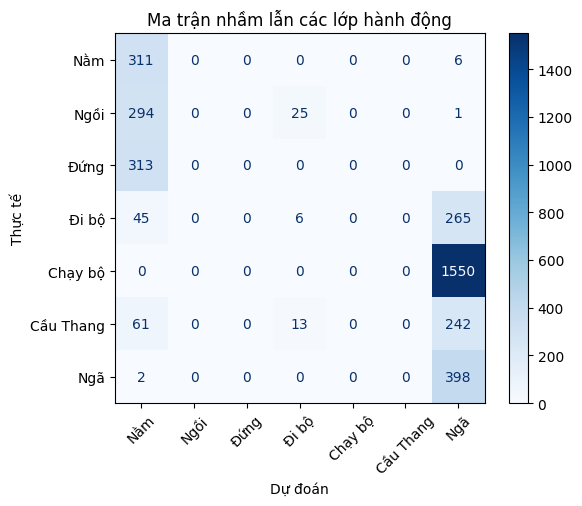

In [ ]:
# import numpy as np
# import pandas as pd
# import pickle
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import joblib
# # ĐƯỜNG DẪN MODEL
# MODEL_PATH = r'C:\Users\quang\OneDrive\Máy tính\DatasetQA\Fall_result\trained_rf_model.pkl'

# # GIẢ SỬ: Bạn đã có các list w_Falling, w_Lying, w_Sitting, w_Standing, w_Walking, w_Jogging, w_Stairing
# # Mỗi phần tử trong các list này là 1 DataFrame (cửa sổ dữ liệu) với cột: 'timestamp', 'Acc_X', 'Acc_Y', 'Acc_Z'

# # Nếu tên cột là 'ax', 'ay', 'az', hãy thay bằng các tên đó ở dưới!

# ACTION_LABELS = [
#     "Nằm",      # 0
#     "Ngồi",     # 1
#     "Đứng",     # 2
#     "Đi bộ",    # 3
#     "Chạy bộ",  # 4
#     "Cầu Thang",# 5
#     "Ngã"       # 6
# ]
# # Thứ tự label: 0: ngã, 1: nằm, 2: ngồi, 3: đứng, 4: đi bộ, 5: chạy bộ, 6: cầu thang

# # Gán nhãn số cho từng list
# action_to_label = {
#     'w_Lying': 0,
#     'w_Sitting': 1,
#     'w_Standing': 2,
#     'w_Walking': 3,
#     'w_Jogging': 4,
#     'w_Stairing': 5,
#     'w_Falling': 6,
# }

# feature_names = [
#     'mean_x', 'mean_y', 'mean_z',
#     'std_x', 'std_y', 'std_z',
#     'max_x', 'max_y', 'max_z',
#     'range_x', 'range_y', 'range_z',
#     'hm_x', 'hm_y', 'hm_z',
#     'autocor_x', 'autocor_y', 'autocor_z'
# ]

# def autocorr(x, lag=1):
#     if len(x) <= lag:
#         return np.nan
#     x1 = x[:-lag]
#     x2 = x[lag:]
#     if np.std(x1) == 0 or np.std(x2) == 0:
#         return 0
#     return np.corrcoef(x1, x2)[0, 1]

# def extract_18_features(df):
#     # convert columns to floats to avoid TypeError
#     df['Acc_X'] = df['Acc_X'].astype(float)
#     df['Acc_Y'] = df['Acc_Y'].astype(float)
#     df['Acc_Z'] = df['Acc_Z'].astype(float)

#     features = []
#     # Đổi tên cột nếu cần: ax/ay/az hoặc Acc_X/Acc_Y/Acc_Z
#     for axis in ['Acc_X', 'Acc_Y', 'Acc_Z']:
#         x = df[axis].values
#         features.append(np.mean(x))
#         features.append(np.std(x))
#         features.append(np.max(x))
#         features.append(np.max(x) - np.min(x))
#         features.append(np.mean(np.abs(x)))
#         features.append(autocorr(x, lag=1))
#     return features

# # --- GHÉP DỮ LIỆU VÀ NHÃN ---
# # Giả sử bạn đã có các list w_Falling, w_Lying, ... đã có sẵn trong RAM

# X = []
# y_true = []

# for name, label in action_to_label.items():
#     w_list = globals().get(name)
#     if w_list is None:
#         print(f"Không tìm thấy dữ liệu {name}! Bỏ qua...")
#         continue
#     for window in w_list:
#         # Nếu cột là ax/ay/az, hãy đổi dòng dưới cho đúng:
#         # window = window.rename(columns={'ax':'Acc_X', 'ay':'Acc_Y', 'az':'Acc_Z'})
#         features = extract_18_features(window)
#         X.append(features)
#         y_true.append(label)

# X = np.array(X)
# y_true = np.array(y_true)

# # --- DỰ ĐOÁN ---
# with open(MODEL_PATH, 'rb') as f:
#     clf4 = joblib.load(MODEL_PATH)

# y_pred = clf4.predict(X)

# # --- VẼ MA TRẬN NHẦM LẪN ---
# cm = confusion_matrix(y_true, y_pred, labels=range(len(ACTION_LABELS)))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ACTION_LABELS)
# disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
# plt.title("Ma trận nhầm lẫn các lớp hành động")
# plt.xlabel("Dự đoán")
# plt.ylabel("Thực tế")
# plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.ndimage import gaussian_filter1d
# import joblib  # Thư viện dùng để tải mô hình đã huấn luyện

# # Hàm đọc dữ liệu cảm biến từ file
# def read_sensor_data(file_path):
#     timestamps, ax, ay, az = [], [], [], []
    
#     with open(file_path, 'r') as file:
#         for line in file:
#             line = line.strip().rstrip(';')  # Loại bỏ dấu chấm phẩy ở cuối dòng
#             parts = line.split(',')
#             if len(parts) == 4:
#                 timestamps.append(int(parts[0]))  # Dữ liệu timestamp ban đầu (nano giây hoặc mili giây)
#                 ax.append(float(parts[1]))
#                 ay.append(float(parts[2]))
#                 az.append(float(parts[3]))
    
#     return np.array(timestamps), np.array(ax), np.array(ay), np.array(az)

# # Hàm loại bỏ nhiễu từ dữ liệu gia tốc
# def remove_outliers(data, threshold=3.0):
#     mean = np.mean(data)
#     std = np.std(data)
#     filtered_data = np.where(abs(data - mean) > threshold * std, np.nan, data)
#     return filtered_data

# # Hàm nội suy giá trị bị mất
# def interpolate_missing_values(data):
#     series = pd.Series(data)
#     return series.interpolate(method='linear').bfill().values  # Nội suy tuyến tính

# # Hàm vẽ đồ thị gia tốc theo thời gian
# def plot_acceleration(timestamps, ax, ay, az):
#     # Chuyển đổi thời gian từ nano giây sang giây (hoặc mili giây sang giây)
#     timestamps = (timestamps - timestamps[0]) / 1e9  # Đổi từ nano giây sang giây
    
#     # Lọc nhiễu
#     ax_filtered = remove_outliers(ax)
#     ay_filtered = remove_outliers(ay)
#     az_filtered = remove_outliers(az)
    
#     # Nội suy các giá trị bị loại bỏ do nhiễu
#     ax_interpolated = interpolate_missing_values(ax_filtered)
#     ay_interpolated = interpolate_missing_values(ay_filtered)
#     az_interpolated = interpolate_missing_values(az_filtered)
    
#     # Áp dụng bộ lọc Gaussian để làm mượt tín hiệu
#     ax_smooth = gaussian_filter1d(ax_interpolated, sigma=3)
#     ay_smooth = gaussian_filter1d(ay_interpolated, sigma=3)
#     az_smooth = gaussian_filter1d(az_interpolated, sigma=3)
    
#     plt.figure(figsize=(10, 5))
#     plt.plot(timestamps, ax, label='Ax (Raw)', color='r', alpha=0.3)
#     plt.plot(timestamps, ay, label='Ay (Raw)', color='g', alpha=0.3)
#     plt.plot(timestamps, az, label='Az (Raw)', color='b', alpha=0.3)
    
#     plt.plot(timestamps, ax_smooth, label='Ax (Smoothed)', color='r')
#     plt.plot(timestamps, ay_smooth, label='Ay (Smoothed)', color='g')
#     plt.plot(timestamps, az_smooth, label='Az (Smoothed)', color='b')
    
#     plt.xlabel('Time (minutes:seconds)')  # Đổi nhãn trục x để thể hiện phút và giây
#     plt.ylabel('Acceleration (g)')
#     plt.title('Acceleration over Time')
#     plt.legend()
#     plt.grid()
#     plt.show()

# # Hàm trích xuất các đặc trưng từ dữ liệu gia tốc


# def extract_features(ax, ay, az):
#     """
#     Hàm trích xuất các đặc trưng từ dữ liệu gia tốc.
#     """
#     # Tính các đặc trưng cơ bản: Mean, Std, Max, Range
#     mean_x = np.mean(ax)
#     mean_y = np.mean(ay)
#     mean_z = np.mean(az)
    
#     std_x = np.std(ax)
#     std_y = np.std(ay)
#     std_z = np.std(az)
    
#     max_x = np.max(ax)
#     max_y = np.max(ay)
#     max_z = np.max(az)
    
#     range_x = np.max(ax) - np.min(ax)
#     range_y = np.max(ay) - np.min(ay)
#     range_z = np.max(az) - np.min(az)
    
#     # Kiểm tra số phần tử của mảng trước khi tính toán gradient
#     if len(ax) > 2:  # Chỉ tính toán gradient nếu mảng có ít nhất 3 phần tử
#         hm_x = np.std(np.gradient(ax))  # Hjorth Mobility cho trục X
#         hm_z = np.std(np.gradient(az))  # Hjorth Mobility cho trục Z
#         hc_x = np.std(np.gradient(np.gradient(ax)))  # Hjorth Complexity cho trục X
#         hc_z = np.std(np.gradient(np.gradient(az)))  # Hjorth Complexity cho trục Z
#         autocor_x = np.corrcoef(ax[:-1], ax[1:])[0, 1]  # Autocorrelation cho trục X
#         autocor_z = np.corrcoef(az[:-1], az[1:])[0, 1]  # Autocorrelation cho trục Z
#     else:
#         # Nếu số phần tử ít, trả về giá trị mặc định hoặc NaN
#         hm_x = hm_z = hc_x = hc_z = autocor_x = autocor_z = np.nan
    
#     return [
#         mean_x, mean_y, mean_z, 
#         std_x, std_y, std_z, 
#         max_x, max_y, max_z, 
#         range_x, range_y, range_z, 
#         hm_x, hm_z, 
#         hc_x, hc_z, 
#         autocor_x, autocor_z
#     ]


# # Hàm dự đoán hành động từ mô hình học máy đã huấn luyện
# def classify_action_with_model(model, ax, ay, az):
#     features = extract_features(ax, ay, az)
#     action = model.predict([features])
#     return action[0]

# # Tải mô hình học máy từ tệp .pkl
# model_path = "fall_detection.pkl"  # Đường dẫn tới tệp mô hình của bạn
# model = joblib.load(model_path)  # Tải mô hình đã huấn luyện

# # Hàm xác định chuỗi hành động và thời gian
# def classify_action_sequence(model, timestamps, ax, ay, az):
#     actions = []
#     action_start_time = timestamps[0]
#     current_action = classify_action_with_model(model, ax, ay, az)  # Dự đoán hành động đầu tiên

#     for i in range(1, len(timestamps)):
#         action = classify_action_with_model(model, ax[i:i+1], ay[i:i+1], az[i:i+1])
        
#         if action != current_action:
#             # Tính toán thời gian hành động
#             action_duration_sec = (timestamps[i-1] - action_start_time) / 1e9  # Chuyển nano giây thành giây
#             action_duration_min = action_duration_sec / 60  # Chuyển giây thành phút
            
#             actions.append(f"{current_action} {action_duration_min:.2f}m {action_duration_sec:.2f}s")
            
#             current_action = action
#             action_start_time = timestamps[i]
    
#     # Lưu hành động cuối cùng
#     action_duration_sec = (timestamps[-1] - action_start_time) / 1e9  # Chuyển nano giây thành giây
#     action_duration_min = action_duration_sec / 60  # Chuyển giây thành phút
#     actions.append(f"{current_action} {action_duration_min:.2f}m {action_duration_sec:.2f}s")
    
#     return actions

# # Đọc file và vẽ đồ thị
# file_path = "D:\\NCKH\\Code_5\\Code_su_ly_realtime\\Chuỗi Hành Động\\realtime\\chuoi_hanh_dong\\kichban_1.txt"
# timestamps, ax, ay, az = read_sensor_data(file_path)
# plot_acceleration(timestamps, ax, ay, az)

# # Xác định chuỗi hành động và thời gian
# actions = classify_action_sequence(model, timestamps, ax, ay, az)

# # In chuỗi hành động và thời gian
# for action in actions:
#     print(action)


FileNotFoundError: [Errno 2] No such file or directory: 'fall_detection.pkl'

Timestamps: [20239069 20242790 20245348 20247850 20250356]
Ax: [-0.048 -0.048 -0.012 -0.012 -0.012]
Ay: [0.832 0.836 0.836 0.836 0.836]
Az: [0.668 0.656 0.656 0.656 0.656]


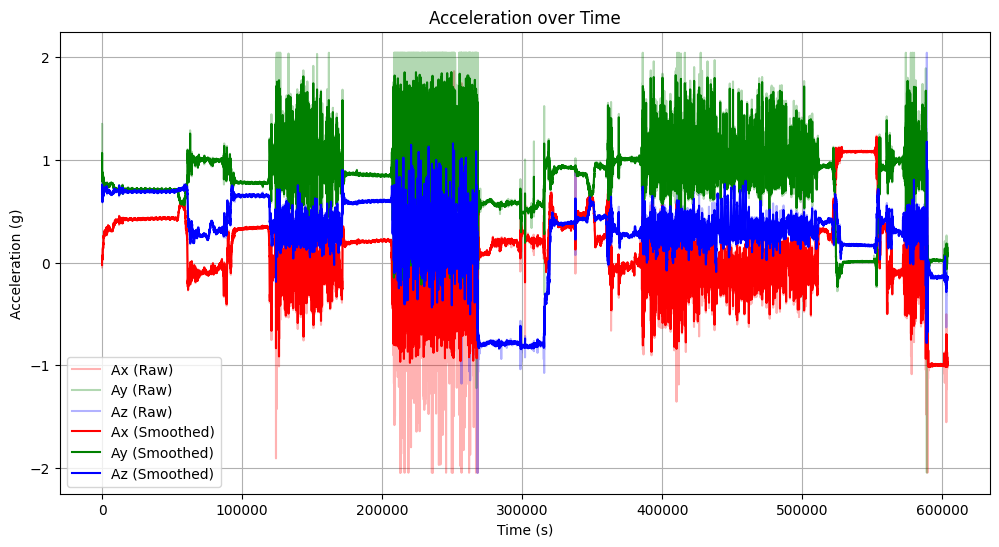


Total duration per action (in minutes and seconds):
Action
Fall        0m 32s
Lying       1m 14s
Sitting     2m 47s
Stairs      2m 20s
Standing    2m 15s
Walking     0m 28s
Name: Duration, dtype: object


In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.ndimage import gaussian_filter1d
# import joblib  # Thư viện dùng để tải mô hình đã huấn luyện
# from concurrent.futures import ThreadPoolExecutor  # Thư viện cho đa luồng

# # Danh sách các hành động tương ứng với chỉ số
# action_names = ['Lying', 'Sitting', 'Standing', 'Walking', 'Jogging', 'Stairs', 'Fall']

# # Hàm đọc dữ liệu cảm biến từ file
# def read_sensor_data(file_path):
#     timestamps, ax, ay, az = [], [], [], []
    
#     with open(file_path, 'r') as file:
#         for line in file:
#             line = line.strip().rstrip(';')  # Loại bỏ dấu chấm phẩy ở cuối dòng
#             parts = line.split(',')
#             if len(parts) == 4:
#                 timestamps.append(int(parts[0]))
#                 ax.append(float(parts[1]))
#                 ay.append(float(parts[2]))
#                 az.append(float(parts[3]))
    
#     return np.array(timestamps), np.array(ax), np.array(ay), np.array(az)

# # Hàm loại bỏ nhiễu từ dữ liệu gia tốc
# def remove_outliers(data, threshold=3.0):
#     mean = np.mean(data)
#     std = np.std(data)
#     filtered_data = np.where(abs(data - mean) > threshold * std, np.nan, data)
#     return filtered_data

# # Hàm nội suy giá trị bị mất
# def interpolate_missing_values(data):
#     series = pd.Series(data)
#     return series.interpolate(method='linear').bfill().values  # Nội suy tuyến tính

# # Hàm trích xuất các đặc trưng từ dữ liệu gia tốc
# def extract_features(ax, ay, az):
#     mean_x = np.mean(ax)
#     mean_y = np.mean(ay)
#     mean_z = np.mean(az)
    
#     std_x = np.std(ax)
#     std_y = np.std(ay)
#     std_z = np.std(az)
    
#     max_x = np.max(ax)
#     max_y = np.max(ay)
#     max_z = np.max(az)
    
#     range_x = np.max(ax) - np.min(ax)
#     range_y = np.max(ay) - np.min(ay)
#     range_z = np.max(az) - np.min(az)
    
#     if len(ax) > 2:
#         hm_x = np.std(np.gradient(ax))
#         hm_z = np.std(np.gradient(az))
#         hc_x = np.std(np.gradient(np.gradient(ax)))
#         hc_z = np.std(np.gradient(np.gradient(az)))
#         autocor_x = np.corrcoef(ax[:-1], ax[1:])[0, 1]
#         autocor_z = np.corrcoef(az[:-1], az[1:])[0, 1]
#     else:
#         hm_x = hm_z = hc_x = hc_z = autocor_x = autocor_z = np.nan
    
#     return [
#         mean_x, mean_y, mean_z, 
#         std_x, std_y, std_z, 
#         max_x, max_y, max_z, 
#         range_x, range_y, range_z, 
#         hm_x, hm_z, 
#         hc_x, hc_z, 
#         autocor_x, autocor_z
#     ]

# # Hàm dự đoán hành động từ mô hình học máy đã huấn luyện
# def classify_action_with_model(model, ax, ay, az):
#     features = extract_features(ax, ay, az)
#     action = model.predict([features])  # Dự đoán hành động
#     return action_names[action[0]]  # Chuyển chỉ số thành tên hành động


# # Hàm xác định chuỗi hành động và thời gian
# def classify_action_sequence(model, timestamps, ax, ay, az, chunk_size=100, merge_threshold=3):
#     actions = []
#     action_start_time = timestamps[0] / 1e9  # Chuyển thời gian đầu vào từ nanoseconds sang giây
#     current_action = classify_action_with_model(model, ax, ay, az)  # Dự đoán hành động đầu tiên

#     for i in range(0, len(timestamps), chunk_size):
#         chunk_timestamps = timestamps[i:i+chunk_size] / 1e9  # Chuyển thời gian trong mỗi chunk từ nanoseconds sang giây
#         chunk_ax = ax[i:i+chunk_size]
#         chunk_ay = ay[i:i+chunk_size]
#         chunk_az = az[i:i+chunk_size]

#         action = classify_action_with_model(model, chunk_ax, chunk_ay, chunk_az)

#         action_duration = (chunk_timestamps[-1] - action_start_time)  # Tính thời gian cho mỗi hành động

#         # Kiểm tra nếu hành động giống nhau trước và sau 3 giây, hợp nhất hành động
#         if action != current_action:
#             if len(actions) > 0 and actions[-1][0] == current_action and action_duration < merge_threshold:
#                 # Nếu hành động giống nhau trước và sau 3 giây, hợp nhất hành động
#                 actions[-1][1] = f"{(pd.to_timedelta(actions[-1][1]).seconds + action_duration):.2f}s"  # Cập nhật thời gian
#             else:
#                 actions.append([current_action, f"{action_duration:.2f}s"])

#             current_action = action
#             action_start_time = chunk_timestamps[0]
    
#     # Lưu hành động cuối cùng
#     action_duration = (timestamps[-1] - action_start_time) / 1e9  # Chuyển từ nanoseconds sang giây
#     if len(actions) > 0 and actions[-1][0] == current_action and action_duration < merge_threshold:
#         actions[-1][1] = f"{(pd.to_timedelta(actions[-1][1]).seconds + action_duration):.2f}s"  # Cập nhật thời gian cuối cùng
#     else:
#         actions.append([current_action, f"{action_duration:.2f}s"])

#     return actions




# # Hàm xử lý song song (đa luồng)
# def process_data_parallel(timestamps, ax, ay, az, model):
#     chunk_size = 100  # Số mẫu mỗi lần xử lý
#     with ThreadPoolExecutor(max_workers=4) as executor:
#         # Chia nhỏ dữ liệu và xử lý song song
#         data_chunks = [(timestamps[i:i+chunk_size], ax[i:i+chunk_size], ay[i:i+chunk_size], az[i:i+chunk_size]) 
#                        for i in range(0, len(timestamps), chunk_size)]
        
#         results = list(executor.map(lambda data: classify_action_sequence(model, *data), data_chunks))
        
#     # Kết quả từ các luồng song song
#     actions = [action for result in results for action in result]
#     return actions

# # Đọc dữ liệu và vẽ đồ thị
# file_path = r"D:\\NCKH\\Code_5\\Code_su_ly_realtime\\Chuỗi Hành Động\\realtime\\chuoi_hanh_dong\\kichban_2.txt" 
# timestamps, ax, ay, az = read_sensor_data(file_path)

# # Kiểm tra dữ liệu
# print(f"Timestamps: {timestamps[:5]}")
# print(f"Ax: {ax[:5]}")
# print(f"Ay: {ay[:5]}")
# print(f"Az: {az[:5]}")

# # Kiểm tra nếu mảng trống
# if len(timestamps) == 0 or len(ax) == 0 or len(ay) == 0 or len(az) == 0:
#     print("Dữ liệu trống! Không có gì để vẽ.")
# else:
#     # Nếu có dữ liệu, gọi hàm vẽ đồ thị
#     plot_acceleration(timestamps, ax, ay, az)

# # Xử lý song song và xác định chuỗi hành động
# model_path = "fall_detection.pkl"  # Đường dẫn tới tệp mô hình của bạn
# model = joblib.load(model_path)  # Tải mô hình đã huấn luyện
# actions = process_data_parallel(timestamps, ax, ay, az, model)

# # Chuyển danh sách hành động thành DataFrame
# actions_df = pd.DataFrame(actions, columns=["Action", "Duration"])

# # Chuyển chuỗi thời gian Duration từ định dạng "xxs" sang timedelta
# actions_df["Duration"] = pd.to_timedelta(actions_df["Duration"])

# # Chuyển đổi tổng thời gian mỗi hành động sang định dạng phút và giây
# actions_df["Duration (min:sec)"] = actions_df["Duration"].apply(lambda x: f"{x.seconds // 60}m {x.seconds % 60}s")

# # Cập nhật tổng thời gian cho các hành động giống nhau
# total_duration_per_action = actions_df.groupby("Action")["Duration"].sum()

# # Chuyển tổng thời gian thành định dạng phút và giây
# total_duration_per_action_minutes_seconds = total_duration_per_action.apply(lambda x: f"{x.seconds // 60}m {x.seconds % 60}s")

# # In kết quả tổng thời gian cho các hành động giống nhau
# print("\nTotal duration per action (in minutes and seconds):")
# print(total_duration_per_action_minutes_seconds)
